**Recycling robot example** (from Sutton, page 42)
References:
  - Gym documentation: https://gym.openai.com/

  

In [1]:
import numpy as np
from gym.envs.toy_text import discrete
import random
import matplotlib.pyplot as plt

# Consider the robot model described in Barto and Sutton Example 3.2

In [70]:
states = ["high", "low"]
actions = ["wait", "search", "recharge"]

P = {}

P[0] = {}
P[1] = {}

alpha = 1
beta = 1
r_wait = 0.5
r_search = 2.0

# We define a discrete environment with the corresponding transitions
def gen_ambient(alpha=alpha, beta=beta, r_wait=r_wait, r_search=r_search):
    P[0][0] = [(1.0, 0, r_wait, False)]
    P[0][1] = [(alpha, 0, r_search, False),
               (1-alpha, 1, r_search, False)]
    P[0][2] = [(1,0,0,False)]

    P[1][0] = [(1.0, 1, r_wait, False)]
    P[1][1] = [(beta, 1, r_search, False), 
               (1-beta, 0, -3.0, False)]
    P[1][2] = [(1.0, 0, 0.0, False)]
    env = discrete.DiscreteEnv(2, 3, P, [0.0, 1.0])
    return(env)

env = gen_ambient()

# Implement the random strategy for 20 steps

Define a random action and see what reward it produces


In [3]:
observation_init = env.reset()
print("Initial Observation=",observation_init)
print("\n")
cum_reward = 0
cumulative_reward = [0]

for t in range(20):

    action = env.action_space.sample() # take a random action
    observation, reward, done, info = env.step(action)
    
    cum_reward += reward
    cumulative_reward.append(cum_reward)
    
    print("Iteration ",t+1)
    print("observation=",observation)
    print("reward=",reward)
    print("done=",done)
    print("info=",info)
    
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break    
    
    print("\n")
env.close()

Initial Observation= 1


Iteration  1
observation= 1
reward= 0.5
done= False
info= {'prob': 1.0}


Iteration  2
observation= 0
reward= 0.0
done= False
info= {'prob': 1.0}


Iteration  3
observation= 0
reward= 0
done= False
info= {'prob': 1}


Iteration  4
observation= 0
reward= 2.0
done= False
info= {'prob': 1}


Iteration  5
observation= 0
reward= 0.5
done= False
info= {'prob': 1.0}


Iteration  6
observation= 0
reward= 0.5
done= False
info= {'prob': 1.0}


Iteration  7
observation= 0
reward= 2.0
done= False
info= {'prob': 1}


Iteration  8
observation= 0
reward= 0.5
done= False
info= {'prob': 1.0}


Iteration  9
observation= 0
reward= 2.0
done= False
info= {'prob': 1}


Iteration  10
observation= 0
reward= 2.0
done= False
info= {'prob': 1}


Iteration  11
observation= 0
reward= 0
done= False
info= {'prob': 1}


Iteration  12
observation= 0
reward= 2.0
done= False
info= {'prob': 1}


Iteration  13
observation= 0
reward= 0.5
done= False
info= {'prob': 1.0}


Iteration  14
observation= 

# Plot the global reward 

In [4]:
#List of time steps
t = list(range(21))

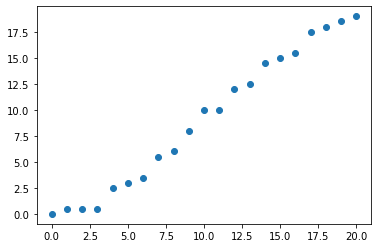

In [5]:
#Plotting cumulative reward
plt.scatter(t,cumulative_reward)

# Compute directly the optimal value function for each state

alpha = 1
beta = 1
r_wait = 0.5
r_search = 2.0

1) State Low

val1 = $beta[r search + gamma.V*(low)] + (1-beta)[-3 + gamma.V*(high)]$ ---> (search)

val2 = $1[r wait + gamma.V*(low)]$ ---> (wait)

val3 = $1[0 + gamma.V*(high)]$ ---> (recharge)

V*(low) = max{val1, val2, val3}

2) State High

val1 = $alpha[r search + gamma.V*(high)] + (1-alpha)[r search + gamma.V*(low)]$ ---> (search)

val2 = $1[r wait + gamma.V*(high)]$ ---> (wait)

V*(high) = max{val1, val2}

In [6]:
#Defining important parameters
gamma = 0.9
theta = 0.1
max_iterations=1e9

# Implement Value Iteration

  Evaluate the optimal value function given a full description of the environment dynamics
  
  

```
 Args:

        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
  
  Returns:
        Vector of length env.nS representing the value function.
```


  
   

In [14]:
def value_iter(env):

    #Initialize state-value function with zeros for each environment state
    V = np.zeros(env.nS)

    for i in range(int(max_iterations)):    

        #Early stopping condition
        delta = 0
        #Finding optimal value function
        for s in range(env.nS):

            #Find the best action for this state
            action_value = np.zeros(env.nA)
            for action in range(env.nA):
                for probability, next_state, reward, terminated in env.P[s][action]:
                    action_value[action] += probability*(reward + gamma*V[next_state])

            #Select best action to perform based on the highest state-action value
            best_action_value = np.max(action_value)        

            #Calculate change in value
            delta = max(delta, np.abs(V[s] - best_action_value))
            #Update the value function for current state
            V[s] = best_action_value

        #Check if we can stop
        if delta < theta:
            break

    #Create a deterministic policy using the optimal value function
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        #Find the best action for this state
        action_value = np.zeros(env.nA)
        for action in range(env.nA):  
            for probability, next_state, reward, terminated in env.P[s][action]:
                action_value[action] += probability*(reward + gamma*V[next_state])      

        #Select best action based on the highest state-action value
        best_action = np.argmax(action_value)
        #Update the policy to perform a better action at a current state
        policy[s] = best_action        
            
    return V, policy

# Implement policy iteration

First a policy evluation

```
Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
        
```

Then a policy improvement:


```
 Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
```





In [83]:
def policy_iter(env):

    #Initialize policy and value arbitrarily
    policy = [0 for s in range(env.nS)]
    V = np.zeros(env.nS)

    is_value_changed = True
    iterations = 0
    while is_value_changed:
        is_value_changed = False
        iterations += 1

        #Policy Evaluation
        # Repeat until change in value is below the threshold
        for i in range(int(max_iterations)):    

            # Initialize a change of value function as zero
            delta = 0
            # run value iteration for each state
            for s in range(env.nS):
                # Initial a new value of current state
                v = 0        
                # Calculate the expected value
                for probability, next_state, reward, terminated in env.P[s][policy[s]]:
                    v += probability*(reward + gamma*V[next_state])            
                # Calculate the absolute change of value function
                delta = max(delta, np.abs(V[s] - v))
                # Update value function
                V[s] = v

            # Terminate if value change is insignificant
            if delta < theta:
                break

        #Policy Improvement
        for s in range(env.nS):
            q_best = V[s]
            for a in range(env.nA):
                q_sa = 0
                for probability, next_state, reward, terminated in env.P[s][a]:
                    q_sa += probability*(reward + gamma*V[next_state])   

                if q_sa > q_best:
                    policy[s] = a
                    q_best = q_sa
                    is_value_changed = True

        #print ("Iterations:", iterations)
    
    return V, policy

# Using the 3 algorithms do the following experiments


In [61]:
exp1 = gen_ambient(alpha=0.9, beta=0.9, r_search=3, r_wait=2)
exp2 = gen_ambient(alpha=0.8, beta=0.5, r_search=3, r_wait=2)
exp3 = gen_ambient(alpha=0.5, beta=0.5, r_search=3, r_wait=2)
exp4 = gen_ambient(alpha=0.9, beta=0.6, r_search=1, r_wait=0.9)
exp5 = gen_ambient(alpha=0.9, beta=0.6, r_search=1, r_wait=0.5)

In [84]:
exp_marco = gen_ambient(alpha=0.5, beta=0.4)

V, policy = value_iter(exp_marco)
print("Value Iteration: V =",V)
V, policy = policy_iter(exp_marco)
print("Policy Iteration: V =",V) 

Value Iteration: V = [13.2791185  11.95120665]
Policy Iteration: V = [13.79310345 12.4137931 ]


In [85]:
exp1 = gen_ambient(alpha=0.9, beta=0.9, r_search=3, r_wait=2)

V, policy = value_iter(exp1)
print("Value Iteration: V =",V)
V, policy = policy_iter(exp1)
print("Policy Iteration: V =",V) 

Value Iteration: V = [27.27134934 25.17163006]
Policy Iteration: V = [28.07142857 25.92857143]


In [86]:
exp2 = gen_ambient(alpha=0.8, beta=0.5, r_search=3, r_wait=2)

V, policy = value_iter(exp2)
print("Value Iteration: V =",V)
V, policy = policy_iter(exp2)
print("Policy Iteration: V =",V)    

Value Iteration: V = [24.75718575 22.28146717]
Policy Iteration: V = [25.42372881 22.88135593]


In [87]:
exp3 = gen_ambient(alpha=0.5, beta=0.5, r_search=3, r_wait=2)

V, policy = value_iter(exp3)
print("Value Iteration: V =",V)
V, policy = policy_iter(exp3)
print("Policy Iteration: V =",V)  

Value Iteration: V = [20.94909811 19.1309167 ]
Policy Iteration: V = [21.81818182 20.        ]


In [88]:
exp4 = gen_ambient(alpha=0.9, beta=0.6, r_search=1, r_wait=0.9)

V, policy = value_iter(exp4)
print("Value Iteration: V =",V)
V, policy = policy_iter(exp4)
print("Policy Iteration: V =",V) 

Value Iteration: V = [8.63491791 8.11370619]
Policy Iteration: V = [9.52631579 9.        ]


In [89]:
exp5 = gen_ambient(alpha=0.9, beta=0.6, r_search=1, r_wait=0.5)

V, policy = value_iter(exp5)
print("Value Iteration: V =",V)
V, policy = policy_iter(exp5)
print("Policy Iteration: V =",V) 

Value Iteration: V = [8.36147152 7.52532436]
Policy Iteration: V = [9.17431193 8.25688073]


# Compare the different strategies with the random one
# Compare the different strategies in terms of speed of convergence for the different scenarios
# What would you do if alpha and beta are unknown (and you dont know RL)? Try to implement something if you have time.


- Policy Iteration involves two steps: policy evaluation and policy improvement. The two are repeated iteratively until policy convergence.
- Value Iteration also involves two steps: finding optimal value function and one policy extraction. In this case, however, the two steps are not repeated iteratively because once the value function is optimal, then the policy obtained from it should also be optimal.
- The algorithms for policy evaluation and finding the optimal value function are very similar, except that the latter has a max operator.
- Even though each iteration of policy iteration is more computationally expensive, this method often takes fewer number of iterations to converge compared to value iteration.